In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

np.random.seed(0)

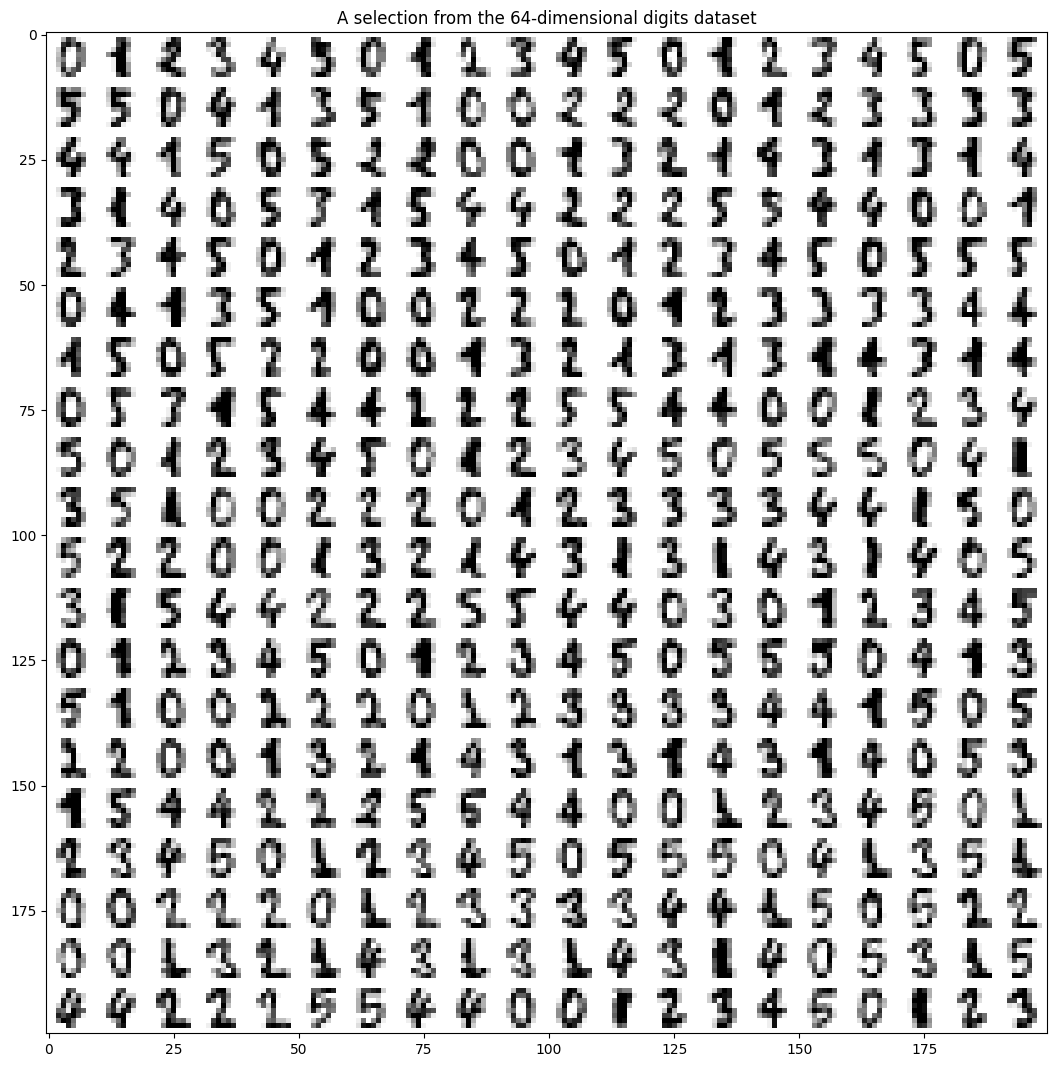

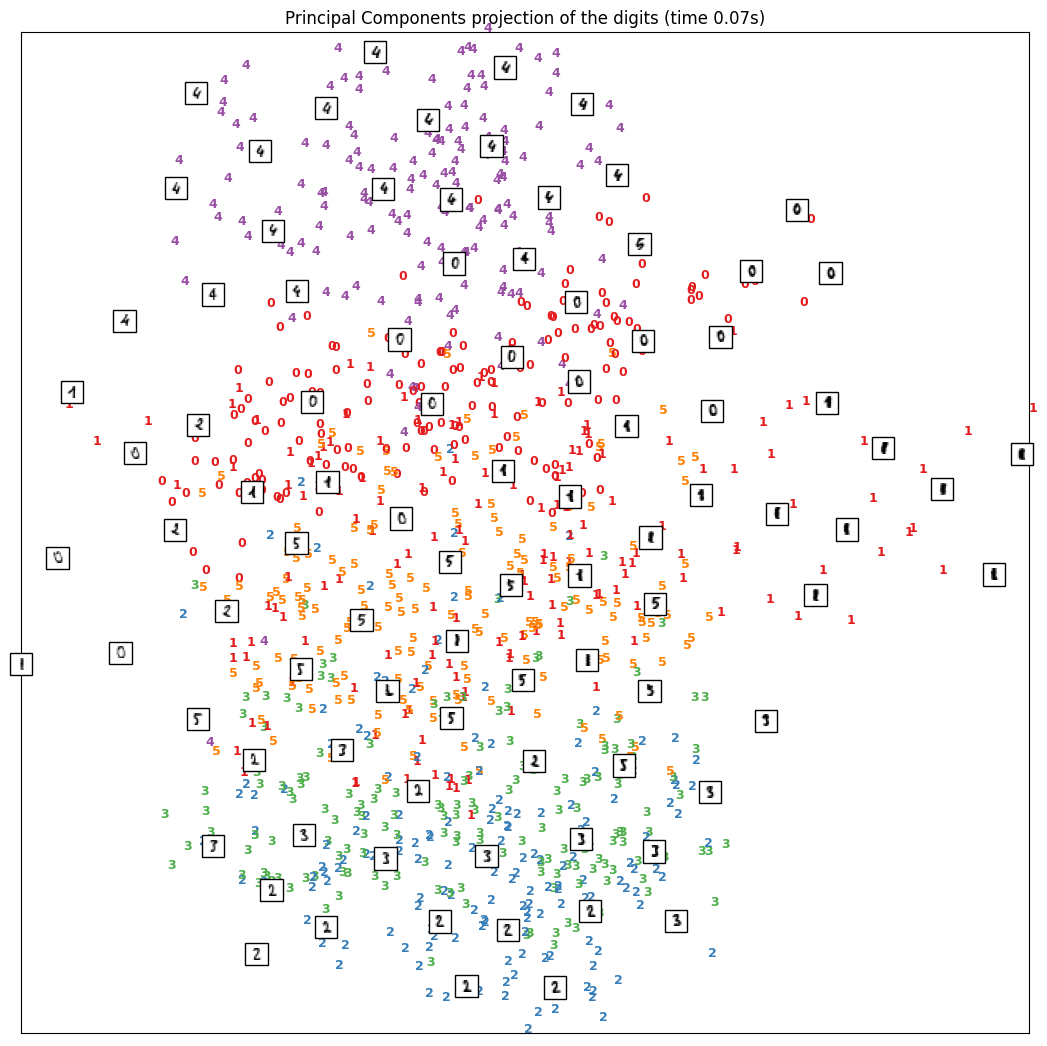

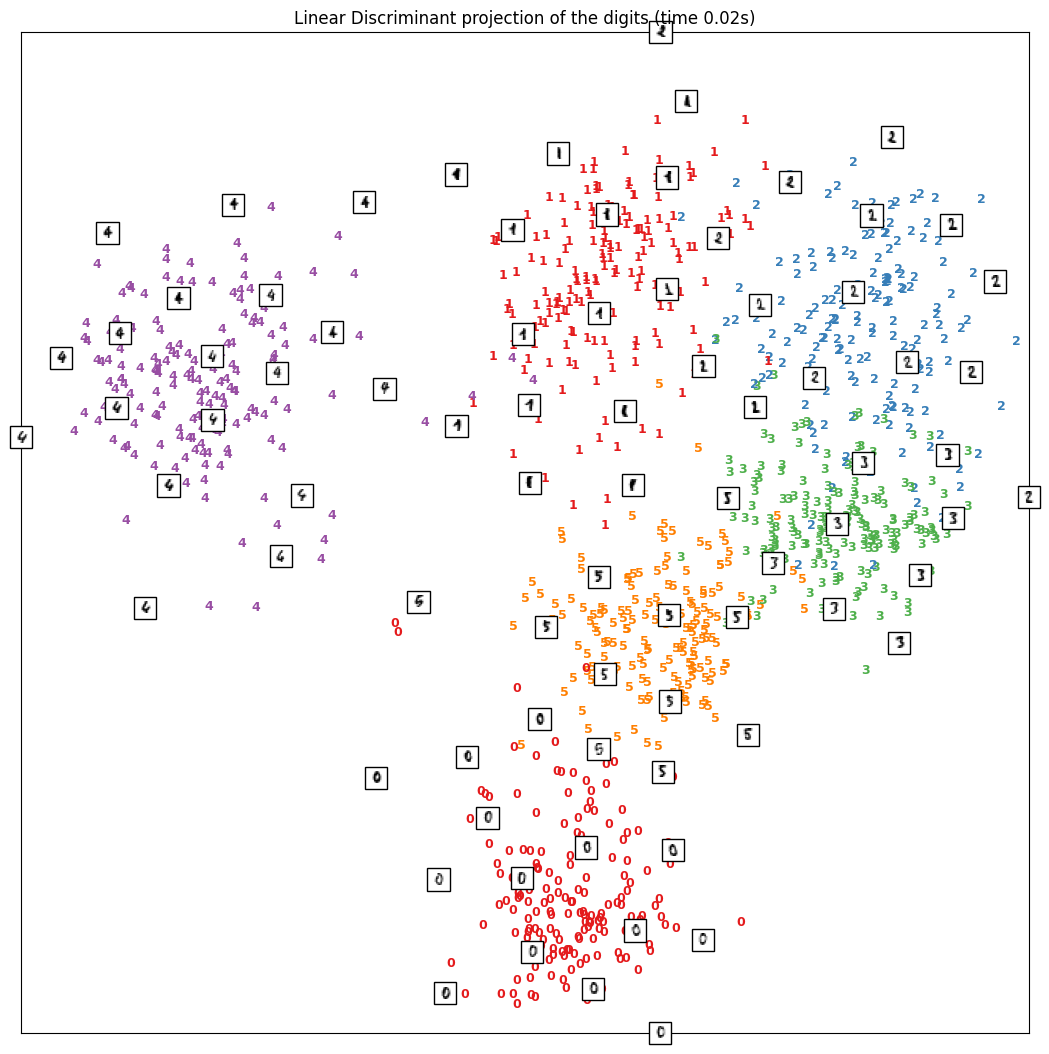

In [34]:
from sklearn import datasets,decomposition,discriminant_analysis
from matplotlib import offsetbox
from time import time

digits=datasets.load_digits(n_class=6)
x=digits.data
y=digits.target
n_samples,n_features=x.shape
n_neighbors=30

#scale and visualize the embedding vectors
def plot_embedding(x, title=None):
    x_min, x_max = np.min(x, 0), np.max(x, 0)
    x = (x - x_min) / (x_max - x_min)

    plt.figure(figsize=(13,13))
    ax = plt.subplot(111)
    for i in range(x.shape[0]):
        plt.text(x[i, 0], x[i, 1], str(y[i]),color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(x.shape[0]):
            dist = np.sum((x[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [x[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                x[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

#plot images of the digits
n_img_per_row = 20
img=np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = x[i * n_img_per_row + j].reshape((8, 8))

plt.figure(figsize=(13,13))
plt.imshow(img,cmap=plt.cm.binary )
#plt.xticks([])
#plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

t0 = time()
x_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(x)
plot_embedding(x_pca,"Principal Components projection of the digits (time %.2fs)" %(time() - t0))

x2 = x.copy()
x2.flat[::x.shape[1] + 1] += 0.01  # Make X invertible
t0 = time()
x_lda = discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_transform(x2, y)
plot_embedding(x_lda,"Linear Discriminant projection of the digits (time %.2fs)" %(time() - t0))
        

In [10]:
x.shape

(1083, 64)

In [11]:
y.shape

(1083,)

In [21]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [24]:
digits.images.shape


(1083, 8, 8)

In [25]:
180*6

1080

In [27]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

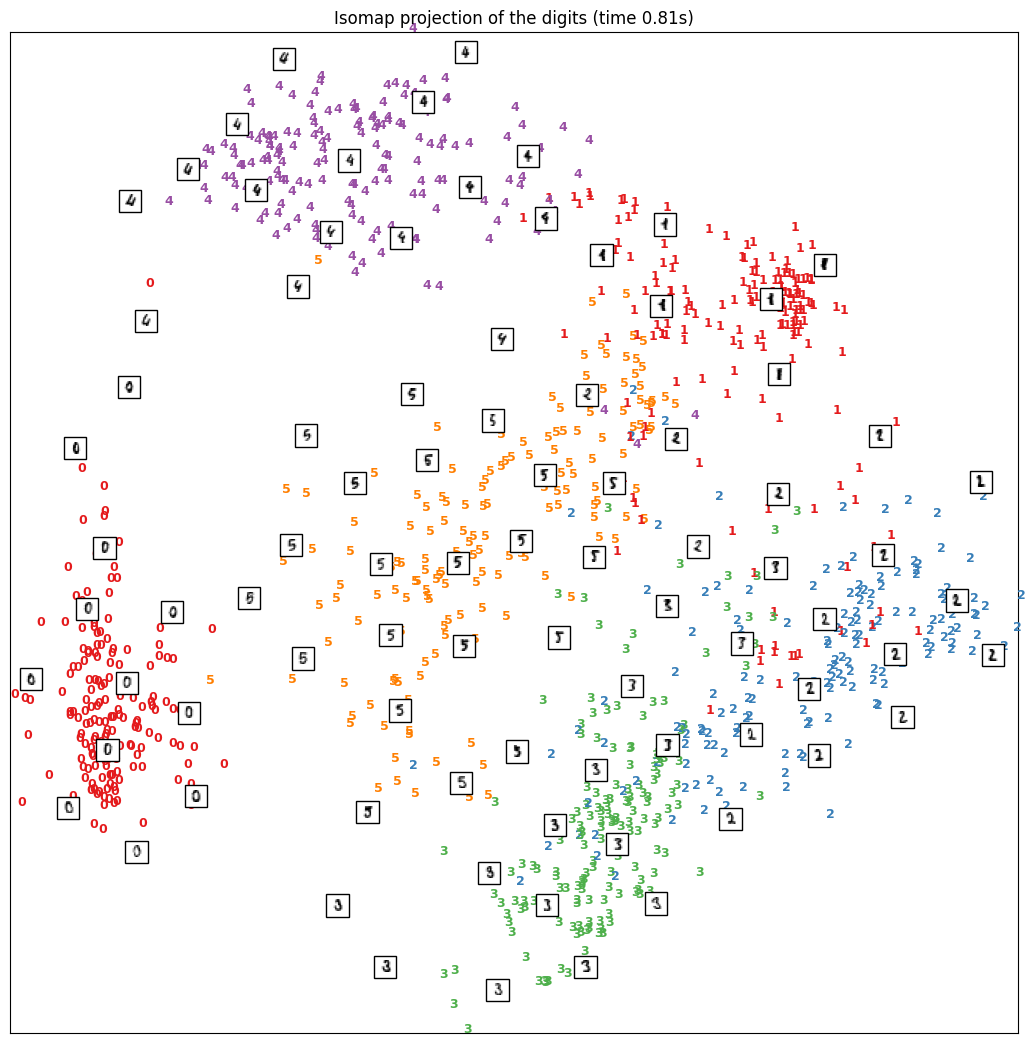

In [40]:
#ISOMAP

from sklearn.manifold import Isomap

t0 = time()
x_iso = Isomap(n_neighbors=30, n_components=2).fit_transform(x)
plot_embedding(x_iso,"Isomap projection of the digits (time %.2fs)" %(time() - t0))

In [41]:
x.shape

(1083, 64)

Reconstruction error: 8.99618e-07


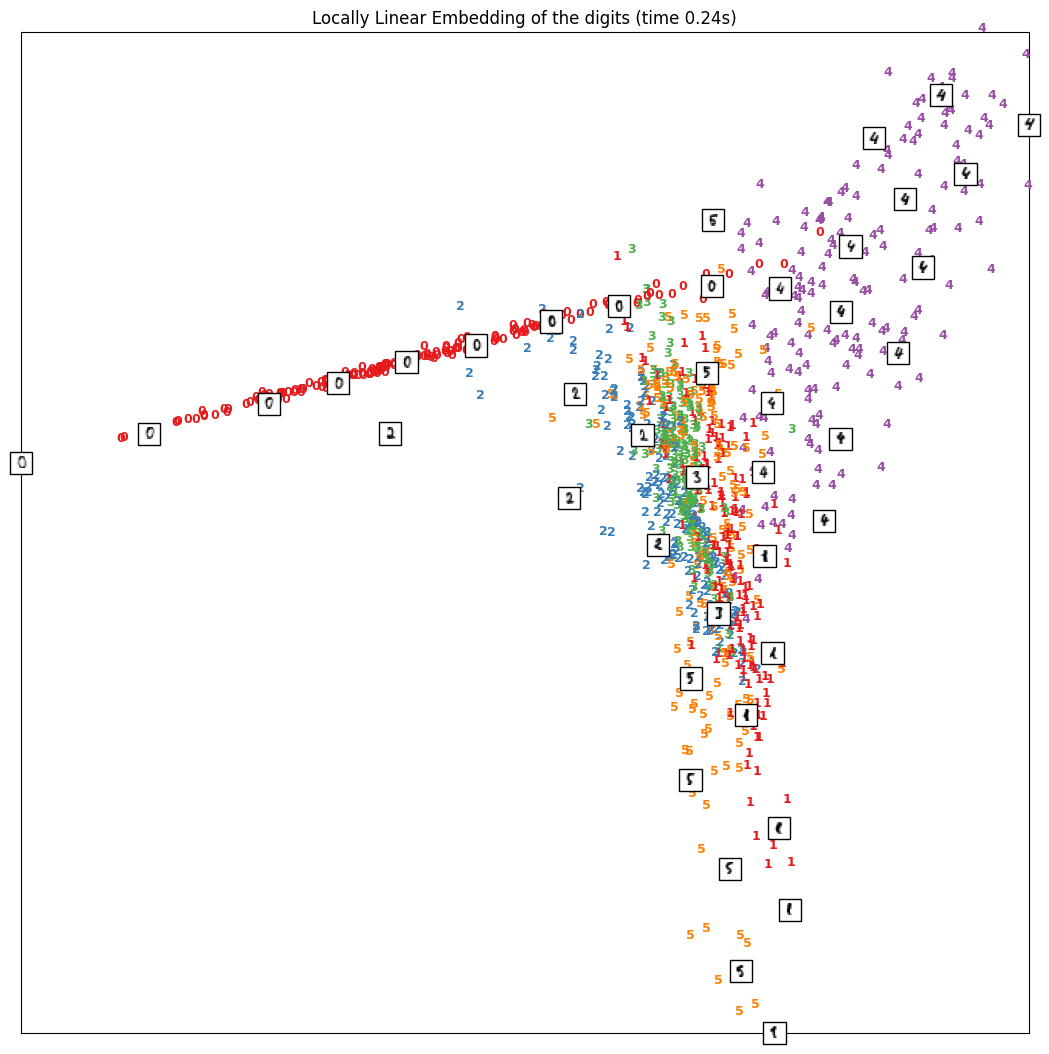

In [52]:
# Locally-linear embedding (LLE)

from sklearn.manifold import LocallyLinearEmbedding

clf=LocallyLinearEmbedding(n_neighbors=30,n_components=2)

t0=time()
x_lle=clf.fit_transform(x)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(x_lle,"Locally Linear Embedding of the digits (time %.2fs)" %(time() - t0))


Reconstruction error: 0.361135


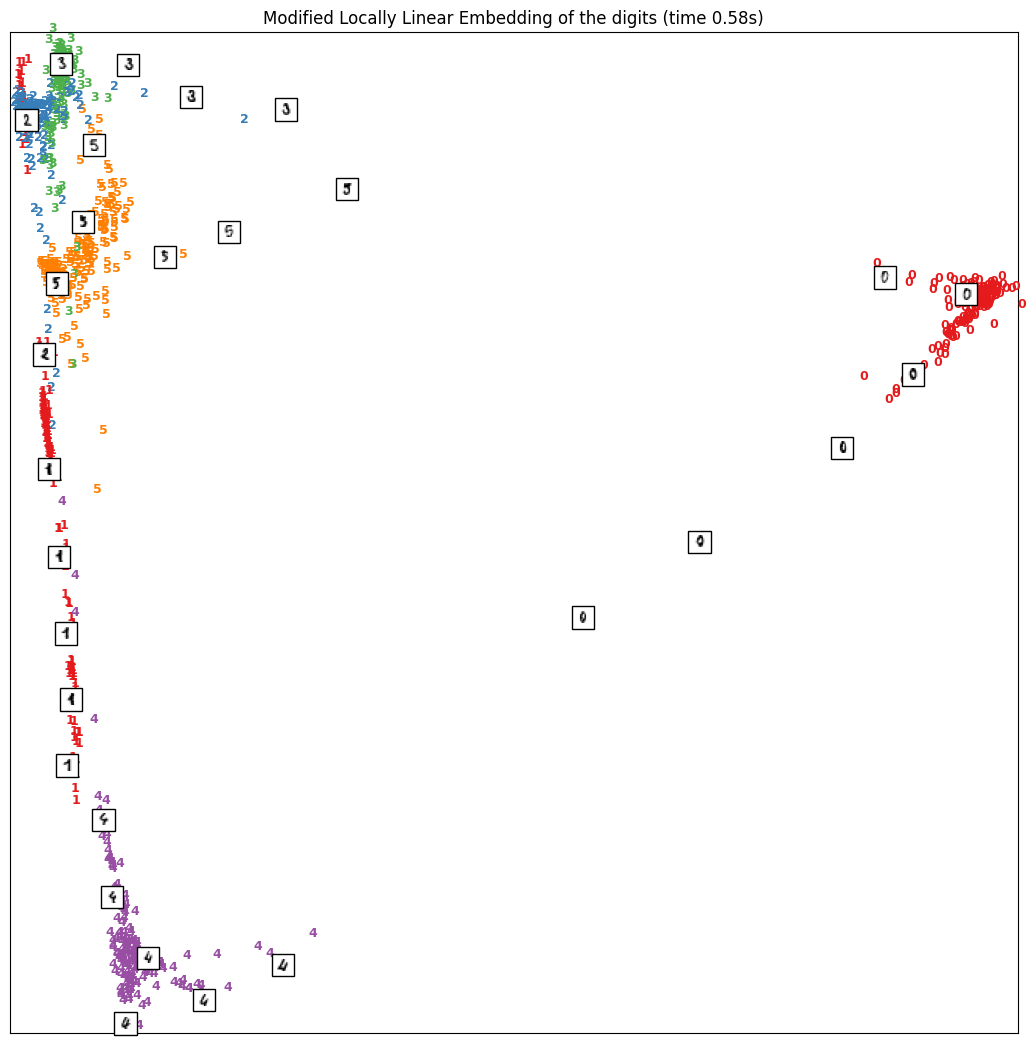

In [53]:
#Modified Locally-Linear Embedding (MLLE)

from sklearn.manifold import LocallyLinearEmbedding

clf=LocallyLinearEmbedding(n_neighbors=30,n_components=2,method='modified')

t0=time()
x_mlle=clf.fit_transform(x)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(x_mlle,"Modified Locally Linear Embedding of the digits (time %.2fs)" %(time() - t0))

Reconstruction error: 0.212894


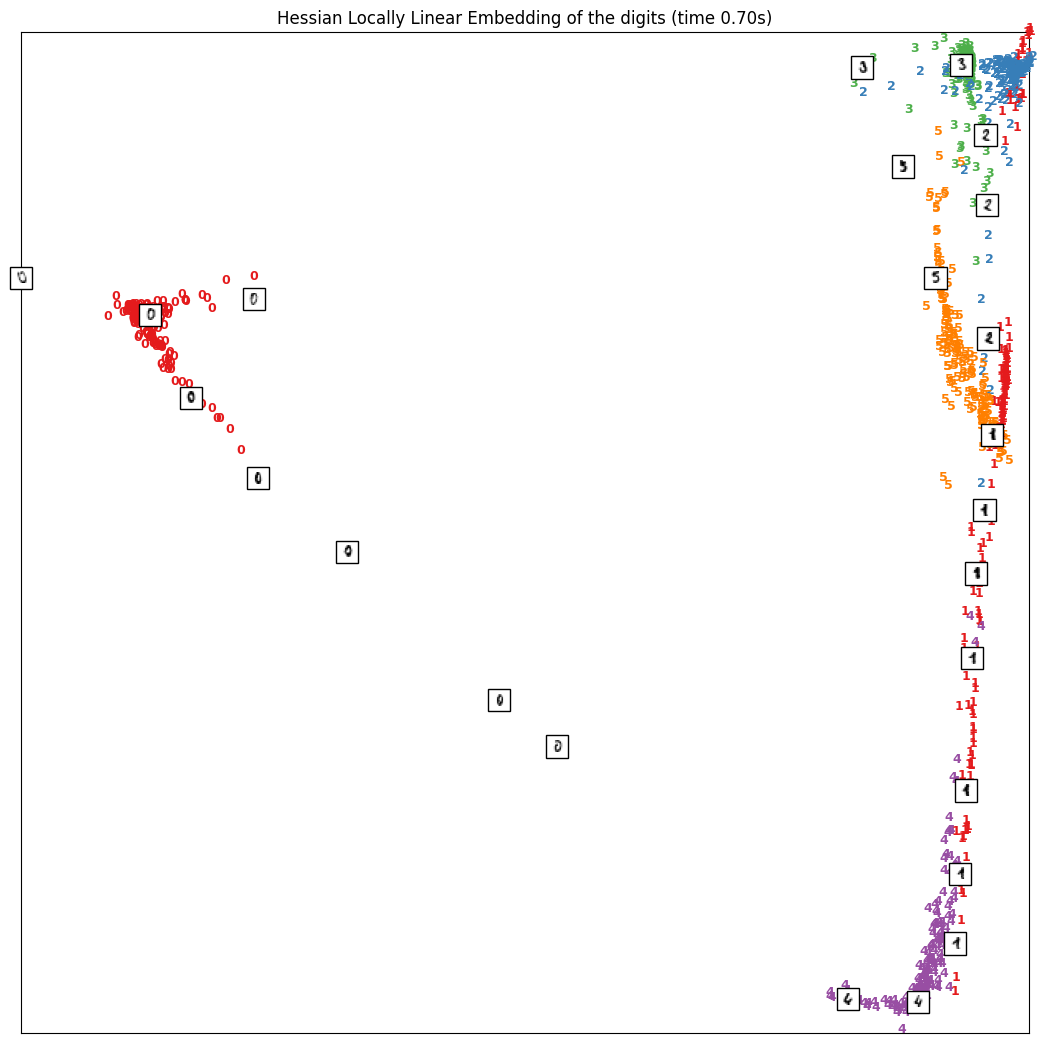

In [57]:
#Hessian Locally-Linear Embedding (Hessian LLE)
from sklearn.manifold import LocallyLinearEmbedding
clf=LocallyLinearEmbedding(n_components=2,n_neighbors=30,method='hessian')

t0=time()
x_hlle=clf.fit_transform(x)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(x_hlle,"Hessian Locally Linear Embedding of the digits (time %.2fs)" %(time() - t0))

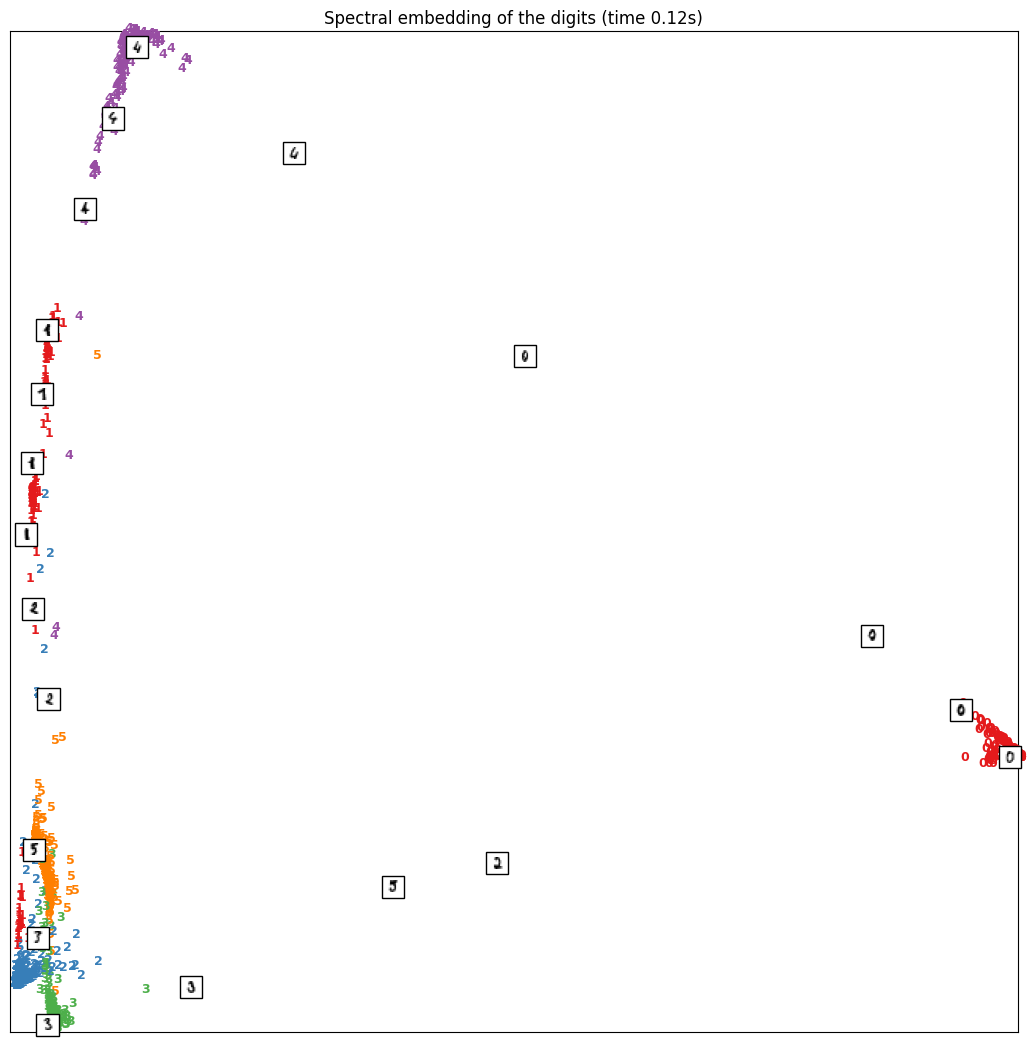

In [64]:
#Spectral Embedding (with Laplacian eigenmaps)
from sklearn.manifold import SpectralEmbedding
clf=SpectralEmbedding(n_components=2,n_neighbors=30)

t0 = time()
x_se = clf.fit_transform(x)
#print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(x_se,"Spectral embedding of the digits (time %.2fs)" %(time() - t0))

Reconstruction error: 0.212893


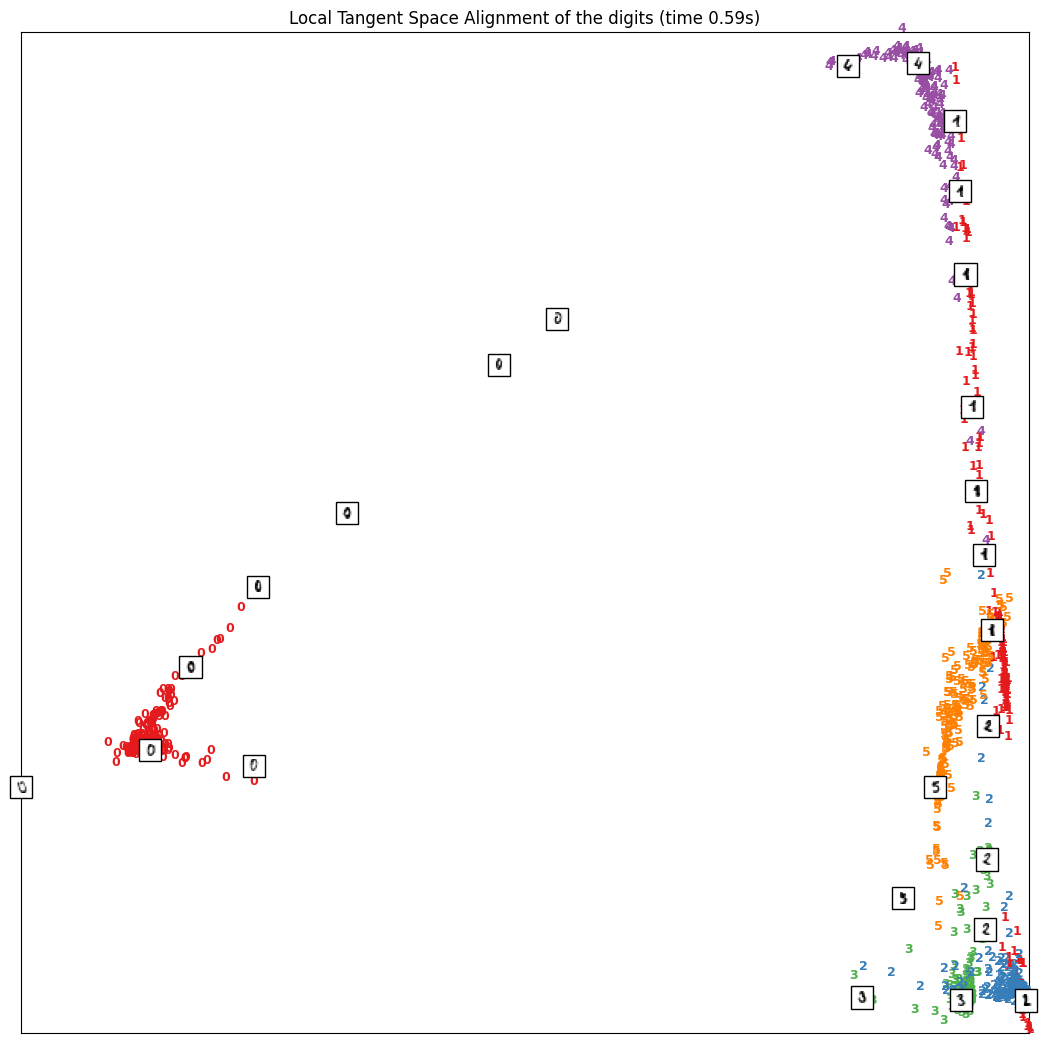

In [62]:
#Local Tangent Space Alignment
from sklearn.manifold import LocallyLinearEmbedding
clf=LocallyLinearEmbedding(n_components=2,n_neighbors=30,method='ltsa')

t0=time()
x_ltsa=clf.fit_transform(x)
print("Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(x_ltsa,"Local Tangent Space Alignment of the digits (time %.2fs)" %(time() - t0))

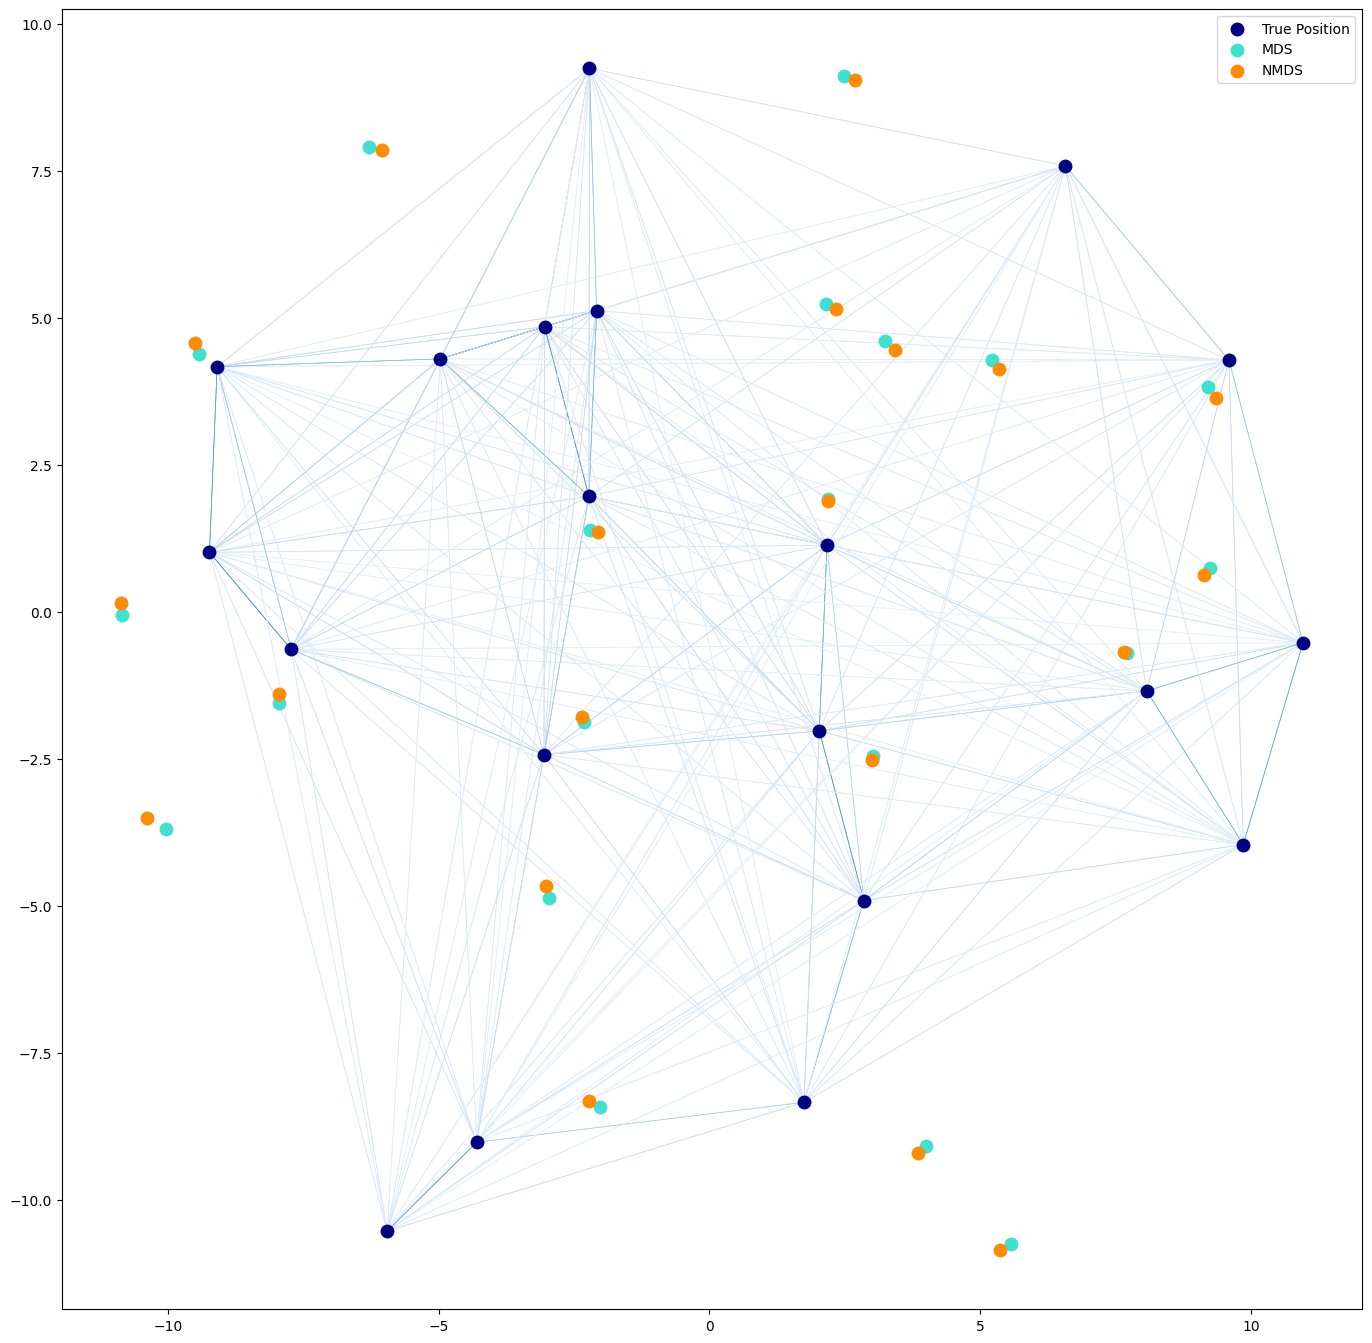

In [117]:
#Multi-dimensional Scaling (MDS): Metric MDS and Nonmetric MDS
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from matplotlib.collections import LineCollection

seed = np.random.RandomState(seed=3)

EPSILON = np.finfo(np.float32).eps
n_samples = 20

X_true = seed.randint(0, 20, 2 * n_samples).astype(np.float32)
X_true = X_true.reshape((n_samples, 2))
# Center the data
X_true -= X_true.mean()

similarities = euclidean_distances(X_true)

# Add noise to the similarities
noise = np.random.rand(n_samples, n_samples)
noise = noise + noise.T
noise[np.arange(noise.shape[0]), np.arange(noise.shape[0])] = 0 # seting diagonal vector to zero
similarities += noise

mds = MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=seed,dissimilarity="precomputed", n_jobs=1)
pos = mds.fit(similarities).embedding_

nmds = MDS(n_components=2, metric=False, max_iter=3000, eps=1e-12,dissimilarity="precomputed", 
           random_state=seed, n_jobs=1, n_init=1)
npos = nmds.fit_transform(similarities, init=pos)

# Rescale the data
pos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((pos ** 2).sum())
npos *= np.sqrt((X_true ** 2).sum()) / np.sqrt((npos ** 2).sum())

# Rotate the data
clf = PCA(n_components=2)
X_true = clf.fit_transform(X_true)

pos = clf.fit_transform(pos)

npos = clf.fit_transform(npos)

fig = plt.figure(figsize=(13, 13))
ax = plt.axes([0., 0., 1., 1.])

s = 100
plt.scatter(X_true[:, 0], X_true[:, 1], color='navy', s=s, lw=0, label='True Position')
plt.scatter(pos[:, 0], pos[:, 1], color='turquoise', s=s, lw=0, label='MDS')
plt.scatter(npos[:, 0], npos[:, 1], color='darkorange', s=s, lw=0, label='NMDS')

plt.legend(scatterpoints=1, loc='best', shadow=False)

similarities = similarities.max() / (similarities + EPSILON) * 100
np.fill_diagonal(similarities, 0)
# Plot the edges
start_idx, end_idx = np.where(pos)

# a sequence of (*line0*, *line1*, *line2*), where::
#            linen = (x0, y0), (x1, y1), ... (xm, ym)
segments = [[X_true[i, :], X_true[j, :]]
            for i in range(len(pos)) for j in range(len(pos))]

values = np.abs(similarities)
lc = LineCollection(segments,zorder=0, cmap=plt.cm.Blues, norm=plt.Normalize(0, values.max()))
lc.set_array(similarities.flatten())
lc.set_linewidths(np.full(len(segments), 0.5))
ax.add_collection(lc)


In [69]:
EPSILON

1.1920929e-07

In [71]:
X_true.shape

(20, 2)

In [76]:
similarities.shape

(20, 20)

In [87]:
noise.shape

(20, 20)

In [94]:
mds.dissimilarity_matrix_.shape

(20, 20)

In [96]:
mds.embedding_.shape

(20, 2)

In [98]:
mds.n_features_in_

20

In [99]:
mds.n_iter_

98

In [101]:
mds.stress_

48.372423614992876

In [110]:
npos.shape

(20, 2)

In [111]:
pos.shape

(20, 2)

In [113]:
X_true.shape

(20, 2)

Stress: 144737621.344904 (The final value of the stress (sum of squared distance of the disparities and thedistances for all constrained points).)


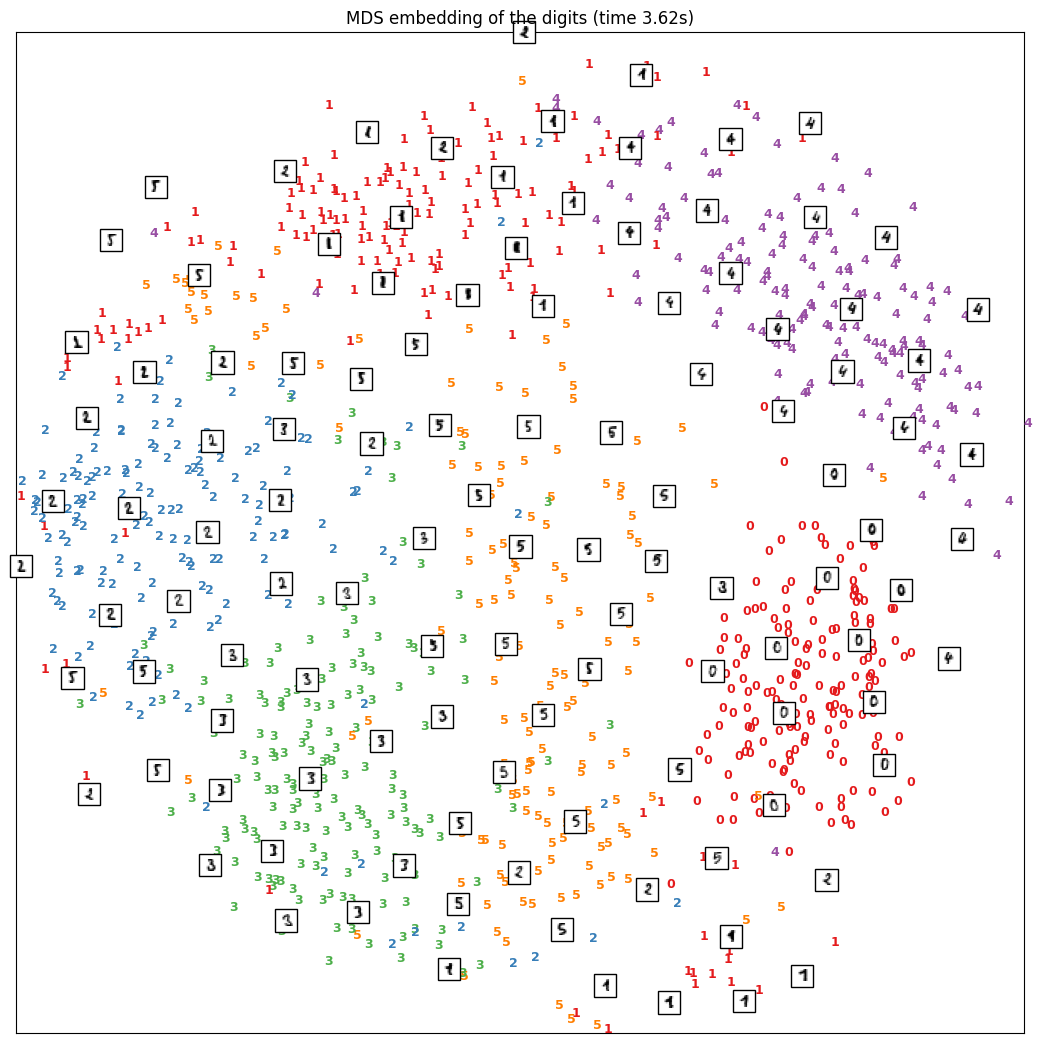

In [121]:
from sklearn.manifold import MDS

clf = MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(x)
print("Stress: %f (The final value of the stress (sum of squared distance of the disparities and the "
      "distances for all constrained points).)" % clf.stress_)
plot_embedding(X_mds,"MDS embedding of the digits (time %.2fs)" %(time() - t0))

In [122]:
x.shape

(1083, 64)

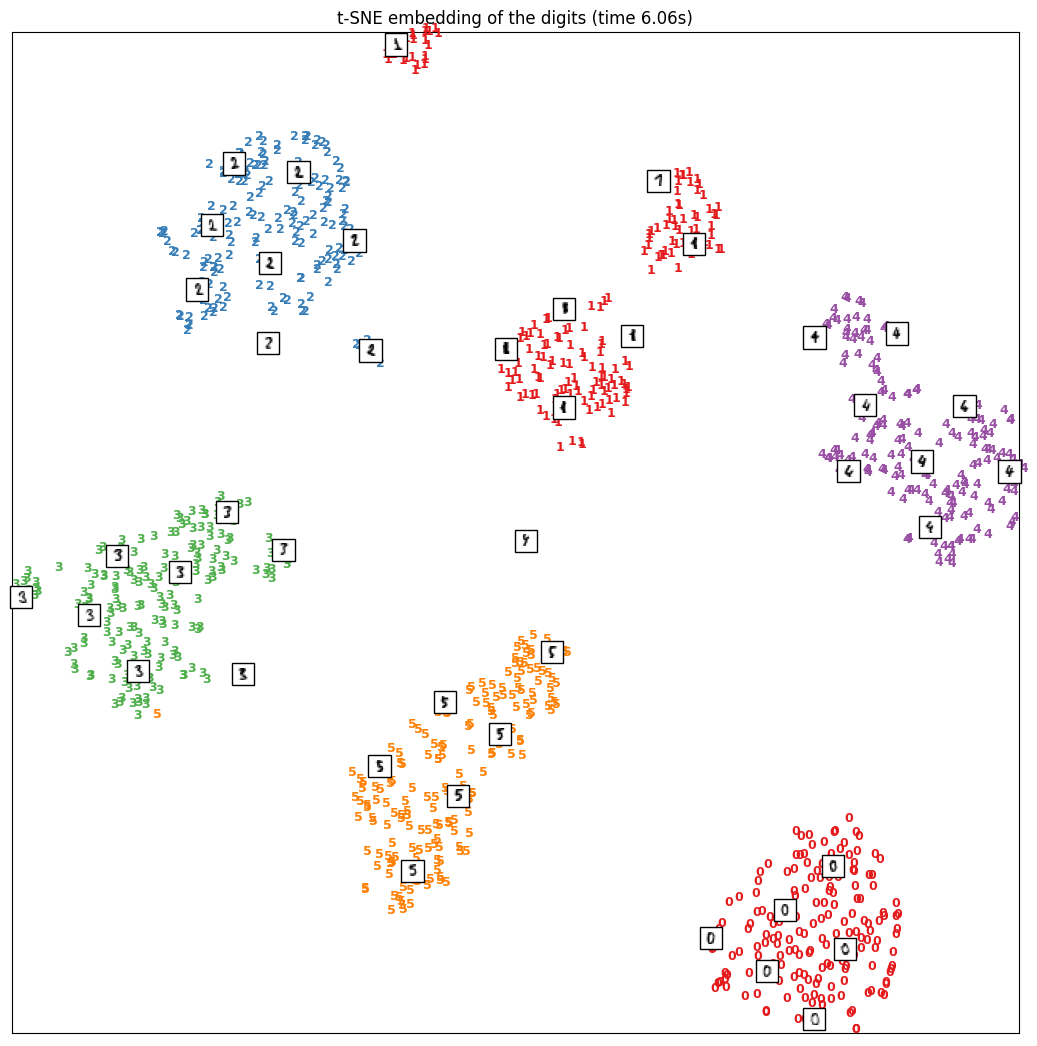

In [137]:
#t-distributed stochastic neighbor embedding

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='pca', method='barnes_hut')

t0 = time()
X_tsne = tsne.fit_transform(x)
plot_embedding(X_tsne,"t-SNE embedding of the digits (time %.2fs)" %(time() - t0))

In [128]:
tsne.embedding_.shape

(1083, 2)

In [129]:
x.shape

(1083, 64)

In [130]:
tsne.kl_divergence_

0.5957314968109131

In [131]:
tsne.learning_rate_

50.0

In [133]:
tsne.n_features_in_

64